- **Studente**: Luca Marletta
- **Ente Formativo** : Profession AI
- **Data 2a Consegna** : 03/7/2025

# A . **CONSEGNA DEL PROGETTO (COMPUTER VISION)**

## - **Sistema di Face Detection per una fotocamera digitale**


**Contesto del Progetto**<br>
La ProCam S.p.A. è pronta a lanciare una nuova fotocamera digitale compatta, accessibile e pensata per i giovani appassionati di fotografia. L'obiettivo principale del prodotto è facilitare l'esperienza di scatto, in particolare per i selfie con una o più persone.

**Sfida** <br>
Sei stato assunto come **Data Scientist** per sviluppare un **sistema di rilevamento volti** nelle immagini, che aiuterà i tecnici a ottimizzare automaticamente le impostazioni della fotocamera durante i selfie. Il tuo compito è realizzare una pipeline che identifichi i volti presenti nelle immagini e restituisca le coordinate dei **bounding box** dove i volti sono individuati. Se non ci sono volti, la pipeline restituirà una lista vuota.

Si tratta di un problema di **Computer Vision**, più precisamente di **Face Detection**.

**Requisiti del Progetto**<br>
**Obiettivo**: <br>
Costruire un sistema di rilevamento dei volti utilizzando Scikit-learn. La pipeline deve essere in grado di:

1. Prendere un’immagine in ingresso.
2.  Restituire una lista di coordinate dei bounding box dove sono presenti volti.
3. Restituire una lista vuota se nell’immagine non ci sono volti.
<br>
**Limitazioni**:

- **Dataset**: Non ti viene fornito un dataset. Devi cercare un dataset adatto in rete o, in mancanza di alternative, costruirlo tu stesso.
- **Modelli pre-addestrati**: Non è consentito utilizzare modelli pre-addestrati. Il modello di Face Detection dovrà essere addestrato da zero con Scikit-learn.
- **Risorse di calcolo**: Lavorerai su un sistema con capacità di calcolo limitate. Il modello dovrà essere ottimizzato per utilizzare poche risorse.
- **Documentazione**: La soluzione deve essere ben documentata. Ogni decisione adottata (scelta degli algoritmi, preprocessamento, tecniche di ottimizzazione) dovrà essere spiegata. Inoltre, ogni risorsa esterna utilizzata (paper accademici, articoli di blog, codice GitHub) dovrà essere citata.

**Ricerca bibliografica**<br>Poiché non ti vengono fornite indicazioni dettagliate sull'implementazione, è essenziale condurre un'approfondita ricerca bibliografica per identificare le soluzioni migliori. Dovrai analizzare approcci già esistenti e adattarli alle limitazioni del progetto.

**Supporto**<br>
Il progetto è complesso e richiede competenze avanzate in Computer Vision e Machine Learning. Se dovessi incontrare difficoltà durante lo sviluppo, potrai sempre contare sul supporto dei tuoi coach nella Classe Virtuale di Machine Learning su Discord.

**Conclusione**<br>
La realizzazione di un sistema di rilevamento volti con risorse limitate e senza dataset preconfezionato è una sfida che richiede una forte capacità di problem-solving e adattamento. Una pipeline ben ottimizzata e documentata non solo contribuirà al successo del lancio del prodotto ProCam, ma rappresenterà anche un passo significativo nella tua crescita professionale come Data Scientist.



# B . **SVOLGIMENTO DEL PROGETTO**

# 0 . **IMPORT DELLE LIBRERIE NECESSARIE**

Per svolgere il progetto sono necessarie alcune librerie fondamentali:

- Pandas e NumPy per la manipolazione dei dati e degli array;

- Matplotlib per la visualizzazione di alcuni output;

- Pickle per importare automaticamente oggetti binari come oggetti Python, facilitando così l’esecuzione e la comprensione del progetto.

- Inoltre, utilizziamo librerie specializzate per la computer vision, come OpenCV e strumenti di supporto come imutils.

Infine, viene impiegata anche la libreria di base per il machine learning, scikit-learn (sklearn), da cui importiamo funzioni utili come la suddivisione in training e test set, le metriche di valutazione dei modelli e il classificatore utilizzato in questo progetto di computer vision.

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pickle
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from skimage.feature import hog
from imutils.object_detection import non_max_suppression

from google.colab import drive
mount_point=drive.mount('/content/drive')
print("\nGOOGLE DRIVE E' STATO CARICATO CON SUCCESSO")
print("\nSPOSTAMENTO VERSO LA DIRECTORY DI LAVORO")
%cd /content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali

print("\nCARTELLA DI LAVORO CORRENTE:\n", os.getcwd())
print("\nFILE PRESENTE NELLA DIRECTORY DI LAVORO:")

for file in os.listdir():
  print("- ", file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

GOOGLE DRIVE E' STATO CARICATO CON SUCCESSO

SPOSTAMENTO VERSO LA DIRECTORY DI LAVORO
/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali

CARTELLA DI LAVORO CORRENTE:
 /content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali

FILE PRESENTE NELLA DIRECTORY DI LAVORO:
-  Face_detection_LucaMarletta_03_07_2025_2aConsegna.ipynb
-  kaggle_dataset_project
-  .ipynb_checkpoints
-  raccolta_file_pkl
-  train_3000_negative_images.pkl
-  hogfeatures_5000nofaces.pkl
-  hogfeatures_146nobodyfaces.pkl
-  train_faces_images_6000faces.pkl
-  hogfeatures_5999faces.pkl
-  hog_CIHPnoface_fv_df3009.pkl
-  final_negative_df_8155entries.csv
-  final_14154_entries.csv
-  SVC_model_14154e.pkl
-  Copia di Face_detection_fotocamere_digitali_27_06_2025.ipynb


# 1 . **Download/unzip dei dataset immagini reperiti dal web**

Alla luce dei vincoli imposti dalla consegna del progetto, è stato adottato un approccio classico di Computer Vision basato su:

* **HOG (Histogram of Oriented Gradients)** per l’estrazione delle feature visive;
* **SVM (Support Vector Machine)** lineare per la classificazione volto/non-volto.

Questo metodo, proposto originariamente da Dalal e Triggs nel 2005, è noto per la sua efficienza ed efficacia nel rilevamento di oggetti all'interno delle immagini, risultando particolarmente adatto a contesti in cui non è possibile impiegare tecniche di deep learning.

---

* Il principio alla base del progetto consiste nel creare un dataset numerico etichettato, seguendo quindi un approccio supervisionato di machine learning. Questo dataset viene fornito in input a un algoritmo di classificazione che, dopo un’adeguata fase di addestramento, sarà in grado di distinguere automaticamente le immagini contenenti volti da quelle che non ne contengono.

* Per addestrare l’algoritmo, è necessario generare da zero delle **feature** capaci di rappresentare le caratteristiche distintive di un volto in una foto. A tal fine, si utilizza la tecnica **HOG**, che verrà descritta nel dettaglio nel capitolo successivo. La tecnica HOG consente di trasformare una foto — originariamente un array multidimensionale — in un’unica riga numerica in cui ogni feature descrive l’intensità e la direzione dei gradienti di luminosità dei pixel. Normalizzando questi gradienti come vettori, è possibile confrontarli numericamente sulla base della somiglianza nelle direzioni. I contorni del viso, la forma degli occhi e delle labbra, ad esempio, generano pattern spaziali molto diversi da quelli prodotti da un gomito, un piede o da uno sfondo naturale come una collina o un’automobile.

* Sulla base di questa metodologia, è quindi possibile etichettare immagini con caratteristiche simili: ad esempio, fotografie standardizzate di volti in diverse angolazioni possono essere associate all’etichetta `1`, mentre immagini di altre parti del corpo, paesaggi, oggetti o animali possono essere associate all’etichetta `0`. Se riusciamo ad addestrare un algoritmo che riceve in input, per ogni immagine, le feature estratte con HOG insieme all’etichetta binaria, il problema della face detection può essere affrontato come un classico problema di classificazione.

Per questa finalità, si utilizza un classificatore **SVM** (Support Vector Machine), come ad esempio **SVC** di scikit-learn, che ha il compito di trovare il piano che separa nel modo ottimale lo spazio iperdimensionale definito dalle feature di ciascuna immagine.

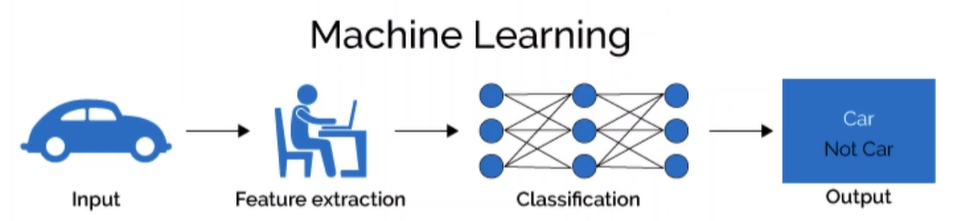


L'obiettivo iniziale è quello di costruire ex novo il dataset da fornire all’algoritmo di machine learning, così da porre le basi per affrontare il problema come una classica attività di classificazione.

Il compito non è affatto banale e richiede che i dati forniti in input siano **standardizzati**, **rappresentativi** e **coerenti con gli obiettivi del progetto**.

Il problema viene quindi configurato come una classificazione supervisionata binaria, così definita:

* **Dataset positivi** (`label == 1`): immagini contenenti volti umani in primo piano.
* **Dataset negativi** (`label == 0`): immagini che non contengono volti, o ne contengono solo parzialmente, comprendendo paesaggi, ambienti interni, animali, o altre parti del corpo umano.

È pertanto fondamentale selezionare con cura i dataset di immagini per costruire le due classi. A tal fine, sono stati utilizzati dataset provenienti da **Kaggle**, **repository GitHub** e dal portale **Dataset Ninja**. Le fonti impiegate sono le seguenti:

* **FairFace dataset** (*FairFace: Face Attribute Dataset for Balanced Race, Gender, and Age* di Kimmo Kärkkäinen e Jungseock Joo):
  Dataset di **positivi**, costituito da immagini `.jpeg` a colori di volti umani appartenenti a etnie, razze, età e generi diversi. È la principale fonte di apprendimento per il classificatore SVC, che apprende le caratteristiche discriminanti del volto umano: contorni di occhi, naso, bocca, orecchie, collo, ecc.

* **landscape-pictures** (*Kaggle user: arnaud58*):
  Dataset di **negativi**, composto da immagini di paesaggi naturali (vegetazione, colline, laghi, montagne).

* **Rooms** (*Kaggle user: robinreni*):
  Dataset di **negativi**, con immagini di stanze interne (cucine, soggiorni, ecc.).

* **Animals** (*Kaggle user: iamsouravbanerjee*):
  Dataset di **negativi**, contenente immagini di animali. È utile per insegnare al modello a distinguere tra le forme e i contorni di un volto umano rispetto a quelli di un animale.

* **CIHP (Crowd Instance-level Human Parsing)**:
  Dataset di **negativi**, composto da oltre 38.000 immagini annotate a livello di pixel per il **parsing del corpo umano** (Gong et al., 2018). Le annotazioni includono segmentazioni precise di viso, capelli, abiti, ecc. Il formato è **Supervisely**, con maschere salvate come bitmap compresse (zlib + Base64). Viene utilizzato per fornire esempi di corpi umani **senza volto**.

* **Body Segmentation** (*Kaggle user: TrainingData*):
  Dataset di **negativi difficili**, composto da immagini `.jpeg` e relative maschere di segmentazione `.png`. Grazie alla maschera cromatica, è possibile rimuovere automaticamente il volto tramite uno script Python, ottenendo così esempi di immagini in cui è presente un corpo umano ma privo del volto, particolarmente utili per affinare la capacità discriminante del modello.

Questi dataset costituiscono la base dati necessaria per costruire un classificatore robusto, in grado di distinguere efficacemente i volti umani da altri contenuti visivi.


Con il seguente blocco di codice, utilizzando comandi da shell e *magic commands* di Colaboratory, si procede al download di alcuni dataset compressi da Kaggle. Per tutti i dataset, l’estrazione degli archivi `.zip` avviene mediante il comando `unzip`, con destinazione nelle directory specificate all’interno di Google Drive.


In [ ]:
#credenziali Kaggle
KAGGLE_USERNAME = "XXXXXXXXXXXX"
KAGGLE_KEY = "XXXXXXXXXXXX"
os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

#DATASET POSITIVO (SOLO VOLTI)
#fairface dataset
#!kaggle datasets download -d mehmoodsheikh/fairface-dataset
#!mv fairface-dataset.zip kaggle_dataset_project && cd kaggle_dataset_project && unzip fairface-dataset.zip && rm -i fairface-dataset.zip

# Landscapes dataset (negativi)
# !kaggle datasets download -d arnaud58/landscape-pictures
#!mkdir kaggle_dataset_project && mv landscape.zip kaggle_dataset_project && cd kaggle_dataset_project && unzip landscape.zip && rm landscape.zip

# # Rooms (negativi)
# !kaggle datasets download -d robinreni/house-rooms-image-dataset
# !mv house-rooms-image-dataset.zip kaggle_dataset_project && cd kaggle_dataset_project && unzip house-rooms-image-dataset.zip && rm -i house-rooms-image-dataset.zip

# # Animals(negativi)
#!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals
#!mv animal-image-dataset-90-different-animals.zip kaggle_dataset_project && cd kaggle_dataset_project && unzip animal-image-dataset-90-different-animals.zip && rm -i animal-image-dataset-90-different-animals.zip

# CIHP (negativi) - corpi segmentati senza volto
#!cd kaggle_dataset_project && unzip CIHP_negatives.zip && rm -i CIHP_negatives.zip

# 2 . **Creazione Dataset positivo (contenente i volti)** - *6000 immagini*

Il dataset positivo è costituito, come indicato in precedenza, da una raccolta di immagini contenenti volti umani, ripresi con diverse angolazioni e condizioni di illuminazione. In particolare, il dataset **FairFace** è noto per il suo **equilibrio demografico**, includendo volti appartenenti a varie razze ed etnie.

Questa caratteristica è fondamentale, poiché consente al classificatore **SVC** di apprendere a **generalizzare le forme dei volti** indipendentemente da variabili come il colore della pelle, la struttura del viso, il taglio di capelli o la presenza di accessori estetici (occhiali, cappelli, ecc.).


In [ ]:
face_base_dir = "/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/FairFace"  # percorso assoluto al Dataset dei volti
positive_base_dir_files = os.listdir(face_base_dir)
positive_base_dir_files

['fairface_label_train.csv', 'fairface_label_val.csv', 'train', 'val', 'val2']

In questa fase, le immagini sono state convertite in oggetti NumPy, sotto forma di una lista di matrici 2D. Ogni immagine è rappresentata da una **tripla di matrici**, una per ciascun canale di colore RGB, permettendo una rappresentazione numerica gestibile in ambiente Python.

Sono state raccolte **6.000 immagini positive**, contenenti volti casuali di persone.

* Le dimensioni di ciascuna immagine sono state **standardizzate** a `224x224x3` (altezza, larghezza, canali BGR — Blue, Green, Red).
* Le immagini così processate sono archiviate all’interno di una lista denominata **`train_faces_images`**.


In [ ]:
face_num_train=6000
train_faces_images=[]

for i in positive_base_dir_files:
    full_path = os.path.join(face_base_dir, i)
    if i.endswith("train") and (os.path.isdir(full_path)):
      images_paths=full_path
      for file in os.listdir(images_paths):
        for num_face in range(0, face_num_train+1):
          if file == f"{num_face}.jpg":
            face_path=os.path.join(images_paths, file)
            print(face_path)
            face = cv2.imread(face_path)
            train_faces_images.append(face)

#esportazine su file
#  with open('train_faces_images_6000faces.pkl', 'wb') as f:
#   pickle.dump(train_faces_images, f)

/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/FairFace/train/92.jpg
/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/FairFace/train/94.jpg
/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/FairFace/train/91.jpg
/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/FairFace/train/95.jpg
/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/FairFace/train/98.jpg
/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/FairFace/train/99.jpg
/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/ka

Il passaggio sopra descritto è particolarmente oneroso in termini di tempo di esecuzione. Per facilitare le successive fasi di sperimentazione in ambito computer vision, da questo punto in poi gli oggetti Python più rilevanti vengono **esportati in formato `.pkl`** durante gli step intermedi.

Questa pratica consente di **velocizzare la pipeline** del progetto, riducendo i tempi di caricamento e preprocessing nelle esecuzioni successive. Inoltre, funge da **backup** e permette di **riprendere il lavoro dal punto corrente** in caso di malfunzionamenti o interruzioni dell’ambiente Colab.


Di seguito viene mostrata una breve anteprima delle immagini che compongono il **dataset dei positivi**, ovvero fotografie contenenti volti umani. Queste immagini saranno fornite al modello classificatore **SVC** come esempi etichettati con **`label == 1`**.


6000
(224, 224, 3)


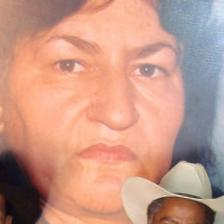

(224, 224, 3)


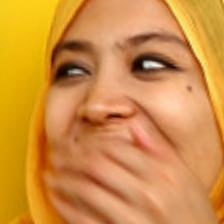

(224, 224, 3)


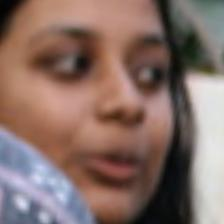

In [ ]:
# # Importazione (caricamento da file dataset volti pre-costruito in precedenza)
with open('train_faces_images_6000faces.pkl', 'rb') as f:
  train_faces_images = pickle.load(f)
print(len(train_faces_images))
for i in train_faces_images[0:3]:
  print(i.shape)
  cv2_imshow(i)

# 3 . **HOG FEATURES +  DATAFRAME POSITIVO**

Raccolte le immagini all’interno di una lista Python, e convertite in array numerici, si può ora procedere con la fase di **feature engineering**, tramite l’estrazione delle feature **HOG (Histogram of Oriented Gradients)**.

Il processo di estrazione HOG da un’immagine inizia con la selezione della **regione di interesse** (ROI), ovvero la porzione dell’immagine che contiene l’elemento da includere o escludere nel processo di riconoscimento.

Successivamente, l’immagine viene suddivisa in **celle** e **blocchi**. Ogni cella, ad esempio di dimensioni **8×8 pixel**, rappresenta l’unità base in cui si analizza la **direzione** e **l’intensità** dei gradienti di colore dei pixel.

La variazione cromatica (o **gradiente**) viene calcolata prendendo come riferimento il pixel centrale della cella (ad esempio, il pixel giallo nella figura sottostante), e determinando la differenza di intensità tra i pixel adiacenti lungo gli assi **x** e **y**.


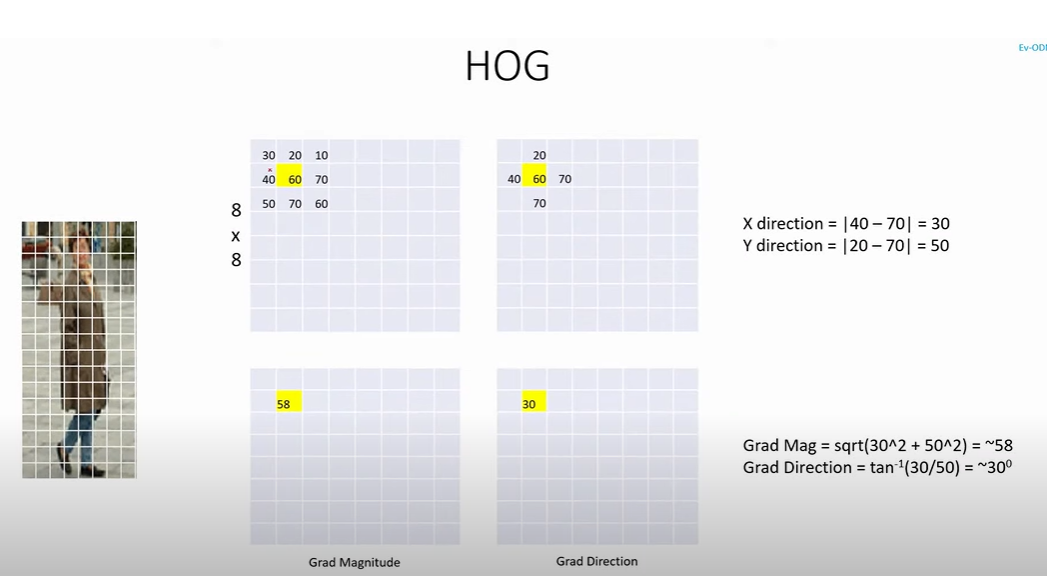

Ogni pixel contribuisce all’istogramma della propria cella in base alla **magnitudo del gradiente**, che viene assegnata al **bin corrispondente alla direzione del gradiente**.

Per ciascun punto della cella, la **magnitudo** è calcolata come la radice quadrata della somma dei quadrati dei gradienti lungo gli assi *x* e *y*, mentre la **direzione** è determinata dall’arcotangente (o cotangente) del rapporto tra il gradiente lungo *y* e quello lungo *x*.

I vettori così ottenuti vengono **normalizzati**, per renderli comparabili tra zone con illuminazioni differenti (ombre e luci), migliorando la robustezza dell’algoritmo rispetto a variazioni di contrasto o esposizione.Per ogni cella viene quindi costruito un **istogramma delle direzioni dei gradienti**, in cui le direzioni sono **quantizzate** in un numero prefissato di intervalli (es. **9 bin** tra 0° e 180°). Gli istogrammi **normalizzati** di tutte le celle e dei relativi blocchi vengono infine **concatenati** in un unico **vettore feature**. Questo vettore rappresenterà teoricamente l’**output finale della trasformazione HOG**, ed è pronto per essere utilizzato come input da parte di un classificatore, come ad esempio **SVM**.


Con il seguente blocco di codice si esegue la **feature extraction** su ciascuna immagine positiva, utilizzando la funzione `hog` della libreria **scikit-image**.

La pipeline adottata per ogni immagine contenuta nella lista `train_faces_images` è la seguente:

1. **Conversione in scala di grigi**: ogni immagine viene convertita da RGB a **grayscale** utilizzando la funzione `cvtColor` della libreria **OpenCV** (`cv2`), riducendo i tre canali di colore a un’unica matrice di intensità.

2. L'immagine risultante in scala di grigi presenta valori di pixel compresi tra **0 (nero)** e **255 (bianco)**.

3. L’immagine in scala di grigi viene passata alla funzione `hog`, che restituisce per ciascuna immagine un **vettore di 6.084 feature HOG**, rappresentante la distribuzione orientata dei gradienti di intensità.

4. A ciascun vettore HOG estratto viene **aggiunta l’etichetta `1`**, che rappresenta la **classe positiva** (volto presente). Questo costituirà il dataset di input per l’addestramento del classificatore **SVC()**.


In [ ]:
 with open('train_faces_images_6000faces.pkl', 'rb') as f:
  train_faces_images=pickle.load(f)

In [ ]:
hog_face_fv=[]
hog_face_image=[]

for i in train_faces_images:
  if i is not None: # Add check here
    gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    hogfv, hog_image = hog(gray,
                           orientations=9,
                           pixels_per_cell=(16, 16),
                           cells_per_block=(2, 2),
                           visualize=True)
    hog_face_fv.append(hogfv)
    hog_face_image.append(hog_image)
  else:
    print("Warning: Non è stato possibile caricare l'immagine")

#creazione dataframe elementi positivi (classe 1 = volti)
positive_class=[]
for _ in range(1,(len(hog_face_fv)+1)):
  positive_class.append(1)
positive_class_df=pd.DataFrame(positive_class, columns=["class"])
hog_face_fv_df= pd.DataFrame(hog_face_fv)
hog_face_fv_df=pd.concat([hog_face_fv_df,positive_class_df], axis=1)
hog_face_fv_df

# with open('hogfeatures_5999faces.pkl', 'wb') as f:
#   pickle.dump(hog_face_fv_df, f)

In [ ]:
 with open('hogfeatures_5999faces.pkl', 'rb') as f:
  hog_face_fv_df= pickle.load(f)

In [ ]:
hog_face_fv_df

,0,1,2,3,4,5,6,7,8,9,...,6075,6076,6077,6078,6079,6080,6081,6082,6083,class
0,0.241908,0.181481,0.113554,0.116223,0.152306,0.120258,0.120657,0.140801,0.107488,0.241908,...,0.332302,0.103783,0.009545,0.020116,0.044003,0.147102,0.297213,0.098281,0.093966,1
1,0.273537,0.015683,0.000000,0.015683,0.370189,0.000000,0.039676,0.062733,0.000000,0.175344,...,0.266816,0.266816,0.266816,0.183229,0.248914,0.043203,0.074807,0.266816,0.242331,1
2,0.057792,0.381531,0.223602,0.020726,0.019292,0.000000,0.010913,0.000000,0.000000,0.169228,...,0.104830,0.005450,0.020682,0.012594,0.036561,0.047327,0.057238,0.046769,0.059045,1
3,0.394352,0.194091,0.050272,0.016746,0.031838,0.009955,0.007950,0.042604,0.085564,0.394352,...,0.079508,0.006724,0.014954,0.022341,0.125289,0.097577,0.296825,0.082159,0.000000,1
4,0.188109,0.008059,0.094826,0.083325,0.127400,0.034985,0.069539,0.000000,0.000000,0.033526,...,0.278505,0.021814,0.021189,0.035967,0.034321,0.018139,0.033132,0.193773,0.293293,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,0.245534,0.092701,0.103188,0.087866,0.147188,0.085139,0.095174,0.160395,0.162743,0.245534,...,0.215071,0.135335,0.117166,0.150931,0.223432,0.205093,0.122347,0.187851,0.084144,1
5995,0.167157,0.056883,0.230144,0.149890,0.230144,0.161892,0.122231,0.066425,0.019281,0.230144,...,0.177149,0.321428,0.171426,0.060538,0.051381,0.030767,0.035988,0.060141,0.045469,1
5996,0.303061,0.303061,0.303061,0.199829,0.130100,0.036488,0.042227,0.036304,0.061702,0.303061,...,0.277456,0.144057,0.048322,0.069530,0.277456,0.277456,0.201749,0.111085,0.099143,1
5997,0.176122,0.153493,0.154183,0.167864,0.185708,0.224609,0.127387,0.083575,0.121618,0.226662,...,0.040055,0.009640,0.040241,0.040847,0.097205,0.024841,0.014989,0.006858,0.002425,1


# 4 . **Creazione dataset negativo (CONTENENTE LANDSCAPES/ROOMS/ANIMALS/CCTV BODY)** *5000 immagini*

In questa fase verrà costruita quella parte di dataset negativi == 0, con la stessa pipeline vista in precedenza. Nella fattispecie questa parte di dataset conterrà le immagini di landscapes, stanze e animali. Inoltre il dataset contiene anche immagini di persone, in scene di vita quotidiana, riprese per strada da telecamere in circuito chiuso di profilo, di spalle o con il volto appena visibile.

In [ ]:
#!cd kaggle_dataset_project && unzip landscape_rooms_animals.zip && rm -i landscape_rooms_animals.zip

Il dataset di immagini **senza volti** deve essere preventivamente **ridimensionato alle dimensioni 224×224**, in quanto le immagini originali presentano risoluzioni variabili, diverse da quelle del **dataset positivo** (FairFace).

Questo passaggio è fondamentale perché, dopo la **vettorizzazione tramite HOG**, sia le immagini della classe **positiva (label = 1)** che quelle della **classe negativa (label = 0)** devono generare **vettori di feature con lo stesso numero di dimensioni**, così da poter essere **concatenati correttamente nel dataset finale**.

In totale, verranno caricate in memoria **5.000 immagini negative**.


In [ ]:
no_face_dataset = "/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/landscape_rooms_animals_body"  # percorso assoluto alla cartella
no_face_images = []
for i in os.listdir(no_face_dataset)[:10]:
    image_path = os.path.join(no_face_dataset, i)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    if image is not None:
        no_face_images.append(image)

(224, 224, 3)


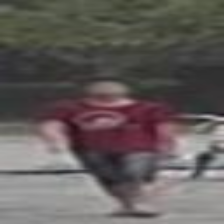

(224, 224, 3)


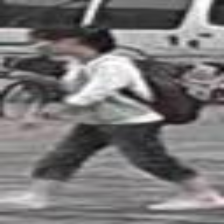

In [ ]:
for i in no_face_images[3:5]:
  print(i.shape)
  cv2_imshow(i)

In [ ]:
hog_no_face_fv=[]
hog_no_face_image=[]

for i in no_face_images:
  if i is not None:
    gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    hogfv, hog_image = hog(gray,
                           orientations=9,
                           pixels_per_cell=(16, 16),
                           cells_per_block=(2, 2),
                           visualize=True)
    hog_noface_fv.append(hogfv)
    hog_no_face_image.append(hog_image)
  else:
    print("Warning: Non è stato possibile caricare l'immagine")

#creazione array di 0
negative_class=[]
for _ in range(1,(1,(len(no_face_images)+1)):
  negative_class.append(0)
negative_class_df=pd.DataFrame(negative_class, columns=["class"])
no_face_images_df= pd.DataFrame(no_face_images_df)
no_face_images_df=pd.concat([no_face_images_df,negative_class_df], axis=1)
no_face_images_df

#**esportazione dataset negativi su file**
# with open('train_5000_negative_images.pkl', 'wb') as f:
#   pickle.dump(no_face_images, f)

In [ ]:
with open('hogfeatures_5000nofaces.pkl', 'rb') as f:
  no_face_images_df= pickle.load(f)

Il dataset **`no_face_images`**, contenente le immagini di **landscapes**, **animals** e **rooms**, avrà dimensioni pari a **5.000 righe × 6.085 colonne**, dove:

* **6.084 colonne** rappresentano le **feature HOG** estratte da ciascuna immagine;
* **1 colonna** corrisponde all’**etichetta di classe**, impostata a `0` (assenza di volto).


In [ ]:
no_face_images_df

,0,1,2,3,4,5,6,7,8,9,...,6075,6076,6077,6078,6079,6080,6081,6082,6083,class
0,0.279515,0.279515,0.279515,0.279515,0.172448,0.000000,0.018455,0.029180,0.088804,0.254415,...,0.213490,0.174416,0.186091,0.213490,0.213490,0.161706,0.135039,0.213490,0.213490,0
1,0.047417,0.005301,0.040235,0.100193,0.298862,0.298862,0.040235,0.000000,0.007497,0.122452,...,0.237351,0.049010,0.055488,0.013982,0.093795,0.031460,0.075166,0.079868,0.058470,0
2,0.466515,0.215405,0.070861,0.100329,0.466515,0.048315,0.040571,0.017081,0.132717,0.051655,...,0.284538,0.107898,0.131734,0.238567,0.359695,0.174880,0.115264,0.090626,0.359695,0
3,0.407513,0.407513,0.407513,0.407513,0.407513,0.042409,0.000000,0.042409,0.407513,0.000000,...,0.183102,0.137825,0.096197,0.072070,0.218852,0.118111,0.095990,0.083369,0.193045,0
4,0.456870,0.013519,0.069516,0.010316,0.456870,0.020781,0.012741,0.009928,0.239849,0.016234,...,0.252289,0.050925,0.103495,0.104668,0.255475,0.097795,0.064137,0.045059,0.034616,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.049914,0.033413,0.017158,0.130745,0.602215,0.099621,0.027121,0.008769,0.019109,0.027698,...,0.011813,0.007585,0.012231,0.007756,0.247486,0.000000,0.001625,0.001285,0.000000,0
4996,0.302527,0.017425,0.033084,0.010316,0.086425,0.095106,0.011825,0.061272,0.302527,0.302527,...,0.219451,0.079122,0.126335,0.133618,0.219451,0.219451,0.160737,0.184282,0.170896,0
4997,0.095059,0.026359,0.036701,0.054132,0.224120,0.297716,0.054152,0.032870,0.010454,0.061712,...,0.255242,0.101272,0.110599,0.038857,0.104512,0.063024,0.119760,0.121931,0.148074,0
4998,0.396186,0.056647,0.033618,0.007449,0.017783,0.004355,0.011516,0.040898,0.148139,0.396186,...,0.200965,0.228858,0.228858,0.113908,0.091282,0.085783,0.160556,0.086142,0.104136,0


## 4.1 **RINFORZO CON NEGATIVI DIFFICILI (Human body segmentation Dataset)** *146 immagini*

Rafforziamo il dataset dei negativi creando delle immagini di corpi umani, maschili e femminili, privi del volto. Infatti, se forniamo al modello soltanto immagini positive di volti e immagini negative di animali, paesaggi o stanze, l'algoritmo di classificazione SVC potrebbe etichettare come positive tutte quelle immagini che non contengono animali, paesaggi o stanze. Ad esempio, in una foto selfie in cui sono presenti un braccio e una gamba, queste parti potrebbero essere erroneamente classificate come positive dal modello.

Per realizzare questa parte del dataset negativo, ho utilizzato il dataset Human Body Segmentation; il seguente blocco di codice ritaglia la forma del volto della persona (identificata tramite una maschera colorata) dall’immagine originale ed elimina tale porzione.

In [ ]:
# 1. Definizione dei percorsi di input e output (invariati)
input_root = "/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/Human Segmentation"
output_root = "/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/Human Segmentation/output_no_faces"
# 2. Mappa dei colori delle maschere .png
color_map = {
    "Men I": (0, 255, 0),
    "Men II": (0, 255, 0),
    "Men Neuro": (0, 255, 0),
    "Women I": (255, 255, 255),
    "Women II": (0, 255, 0),
    "Women III": (0, 255, 0),
    "Women IV": (0, 255, 0)}
# 3. Creazione della cartella di output
print(f"La cartella di output sarà: {output_root}")
os.makedirs(output_root, exist_ok=True)
print("Cartella di output creata o già esistente.")
# 4. Scansione delle cartelle principali nel dataset
print("\nInizio del processo di elaborazione (versione corretta)...")
for category_folder in os.listdir(input_root):
    if category_folder in color_map:
        print(f"\n--- Elaborazione della cartella: {category_folder} ---")
        category_path = os.path.join(input_root, category_folder)
        if not os.path.isdir(category_path):
            continue
        target_color_bgr = np.array(color_map[category_folder], dtype=np.uint8)
        # 5. Itera su ogni file nella cartella di categoria
        files_processed = 0
        for filename in os.listdir(category_path):
            if filename.lower().endswith((".jpg", ".jpeg")):
                image_path = os.path.join(category_path, filename)
                # Costruisce il nome della maschera corrispondente
                base_filename, _ = os.path.splitext(filename)
                mask_filename = base_filename + ".png"
                # Cerca la maschera nella STESSA cartella
                mask_path = os.path.join(category_path, mask_filename)
                if not os.path.exists(mask_path):
                    continue
                try:
                    original_image = cv2.imread(image_path)
                    mask_image = cv2.imread(mask_path)
                    if original_image is None or mask_image is None:
                        print(f"ERRORE: Impossibile leggere immagine o maschera per {filename}. Salto.")
                        continue
                    if original_image.shape[:2] != mask_image.shape[:2]:
                         mask_image = cv2.resize(mask_image, (original_image.shape[1], original_image.shape[0]), interpolation=cv2.INTER_NEAREST)
                    condition = np.all(mask_image == target_color_bgr, axis=2)
                    original_image[condition] = [0, 0, 0]
                    output_path = os.path.join(output_root, filename)
                    cv2.imwrite(output_path, original_image)
                    files_processed += 1
                except Exception as e:
                    print(f"Si è verificato un errore durante l'elaborazione di {filename}: {e}")
        if files_processed > 0:
            print(f"Elaborati e salvati {files_processed} file.")
        else:
            print("Nessun file immagine/maschera corrispondente trovato in questa cartella.")
print("\n--- Processo completato! ---")
print(f"Tutte le immagini elaborate sono state salvate in: {output_root}")

La cartella di output sarà: /content/drive/MyDrive/02. Profession AI/ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/Human Segmentation/output_no_faces
Cartella di output creata o già esistente.

Inizio del processo di elaborazione (versione corretta)...

--- Processo completato! ---
Tutte le immagini elaborate sono state salvate in: /content/drive/MyDrive/02. Profession AI/ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/Human Segmentation/output_no_faces


eliminati i volti dalle immagini originali, verranno caricati nella lista no_facebody_images, previo ridimensionamento a 224x224 pixel come fatto in precedenza per le altre tipologia di immagini:

In [ ]:
no_facebody_dataset = "/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/Human_Segmentation/output_no_faces"
no_facebody_images = []
for i in os.listdir(no_facebody_dataset):
    image_path = os.path.join(no_facebody_dataset, i)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    if image is not None:
        no_facebody_images.append(image)

146
(224, 224, 3)


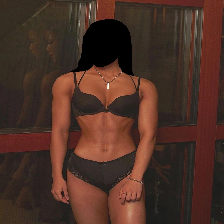

(224, 224, 3)


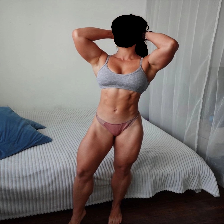

(224, 224, 3)


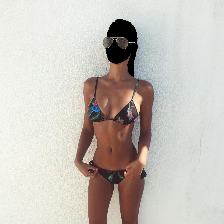

In [ ]:
print(len(no_facebody_images))
for i in no_facebody_images[0:3]:
  print(i.shape)
  cv2_imshow(i)

Con il seguente blocco di codice creeremo il dataset di features di 146 immagini, senza volto e con etichetta ==0:

In [ ]:
no_boydface_images_fv=[]
no_boydface_images_fv_image=[]
for i in no_facebody_images:
  gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  hogfv, hog_image = hog(gray,
                         orientations=9,
                         pixels_per_cell=(16, 16),
                         cells_per_block=(2, 2),
                         visualize=True)
  no_boydface_images_fv.append(hogfv)
  no_boydface_images_fv_image.append(hog_image)

#creazione array di 0
negative_class=[]
for _ in range(1,(146+1)):
  negative_class.append(0)
negative_class_df=pd.DataFrame(negative_class, columns=["class"])
hog_no_bodyface_images_fv_df= pd.DataFrame(no_boydface_images_fv)
hog_no_bodyface_images_fv_df=pd.concat([hog_no_bodyface_images_fv_df,negative_class_df], axis=1)
hog_no_bodyface_images_fv_df

#**Esportazione df Hog Features (negativi)**
# with open('hogfeatures_146nobodyfaces.pkl', 'wb') as f:
#   pickle.dump(hog_no_bodyface_images_fv_df, f)

In [ ]:
 with open('hogfeatures_146nobodyfaces.pkl', 'rb') as f:
  nofacebody_images_df=pickle.load(f)

il nofacebody_images_df cosi costruito avra 146 righe x 6085 features (di cui 1 è class=0)

In [ ]:
nofacebody_images_df

,0,1,2,3,4,5,6,7,8,9,...,6075,6076,6077,6078,6079,6080,6081,6082,6083,class
0,0.245876,0.098167,0.162114,0.127039,0.220021,0.086478,0.115887,0.096109,0.134785,0.245876,...,0.289586,0.181740,0.079993,0.114517,0.289586,0.133190,0.129185,0.144305,0.289586,0
1,0.267521,0.179650,0.267521,0.128689,0.267521,0.051804,0.100218,0.015846,0.044819,0.244484,...,0.088012,0.066778,0.087083,0.116362,0.121842,0.075939,0.053573,0.057838,0.023097,0
2,0.215302,0.201242,0.146629,0.169343,0.215302,0.145626,0.118085,0.103595,0.075344,0.215302,...,0.209797,0.170716,0.164724,0.174948,0.209797,0.173498,0.187388,0.169766,0.114303,0
3,0.392362,0.089583,0.073944,0.099624,0.085801,0.092161,0.077680,0.134662,0.392362,0.173239,...,0.215707,0.215707,0.113782,0.215707,0.215707,0.196873,0.115903,0.188923,0.097853,0
4,0.211613,0.187953,0.189030,0.201003,0.131244,0.127089,0.061923,0.082717,0.092940,0.211613,...,0.206369,0.085438,0.148899,0.146959,0.211085,0.211085,0.200710,0.140353,0.196263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.114723,0.055144,0.033353,0.031876,0.078751,0.061034,0.088380,0.132674,0.072459,0.114349,...,0.163876,0.082311,0.114761,0.115019,0.205833,0.159888,0.135719,0.131614,0.078464,0
142,0.267634,0.072906,0.036963,0.023946,0.160650,0.087938,0.078579,0.197115,0.267634,0.267634,...,0.249129,0.249129,0.249129,0.215043,0.249129,0.082346,0.249129,0.072816,0.249129,0
143,0.014264,0.006377,0.002565,0.368792,0.590869,0.096832,0.007958,0.003311,0.000000,0.017584,...,0.110349,0.089478,0.145826,0.087440,0.098027,0.040597,0.041492,0.007148,0.013478,0
144,0.180027,0.018477,0.010167,0.005503,0.011410,0.005832,0.024273,0.241998,0.438395,0.064674,...,0.161879,0.113448,0.217175,0.091320,0.185771,0.055580,0.035092,0.059776,0.013458,0


## 4.2 **Rinforzo negativi (CIHP dataset) - body senza volto** *3009 immagini*

In questa sezione procederò alla raccolta di immagini negative (corpi senza volto) seguendo la stessa metodologia, ma utilizzando un dataset differente, ovvero il CIHP dataset. Questo dataset, oltre a contenere molte più immagini (per questioni di spazio ne ho selezionate solo 3009 immagini)



In [ ]:
CIHPnoface_dataset = "/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/CIHP_negatives"
CIHPnoface_image = []
for i in os.listdir(CIHPnoface_dataset):
    image_path = os.path.join(CIHPnoface_dataset, i)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    if image is not None:
        CIHPnoface_image.append(image)

3009
(224, 224, 3)


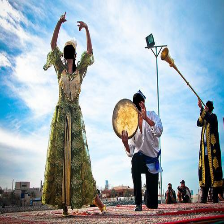

(224, 224, 3)


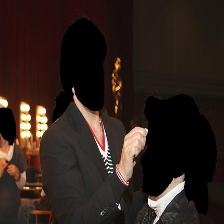

(224, 224, 3)


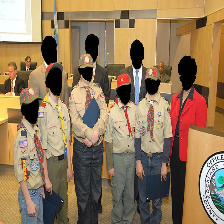

In [ ]:
print(len(CIHPnoface_image))
for i in CIHPnoface_image[0:3]:
  print(i.shape)
  cv2_imshow(i)

il dataset delle immagini CIHP è stato poi vettorizzato con le HOG features, ed stato trasformato anch'esso in un dataframe di 3009 righe x 6085 features (di cui una è l'etichetta 0).

In [ ]:
CIHPnoface_fv=[]
CIHPnoface_fv_image=[]
for i in CIHPnoface_image:
  gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  hogfv, hog_image = hog(gray,
                         orientations=9,
                         pixels_per_cell=(16, 16),
                         cells_per_block=(2, 2),
                         visualize=True)
  CIHPnoface_fv.append(hogfv)
  CIHPnoface_fv_image.append(hog_image)

#creazione array di 0
negative_class=[]
for _ in range(1,(len(CIHPnoface_image)+1)):
  negative_class.append(0)
negative_class_df=pd.DataFrame(negative_class, columns=["class"])

hog_CIHPnoface_fv_df= pd.DataFrame(CIHPnoface_fv)
hog_CIHPnoface_fv_df=pd.concat([hog_CIHPnoface_fv_df,negative_class_df], axis=1)
hog_CIHPnoface_fv_df

# #**Esportazione df Hog Features (negativi)**
# with open('hog_CIHPnoface_fv_df3009.pkl', 'wb') as f:
#   pickle.dump(hog_CIHPnoface_fv_df, f)

In [ ]:
with open('hog_CIHPnoface_fv_df3009.pkl', 'rb') as f:
  hog_CIHPnoface_fv_df= pickle.load(f)

In [ ]:
hog_CIHPnoface_fv_df

,0,1,2,3,4,5,6,7,8,9,...,6075,6076,6077,6078,6079,6080,6081,6082,6083,class
0,0.185920,0.120890,0.093415,0.166401,0.158376,0.101505,0.188647,0.177796,0.157141,0.281068,...,0.115008,0.042000,0.055863,0.069420,0.148982,0.065788,0.060858,0.054666,0.020589,0
1,0.164724,0.100601,0.201764,0.156732,0.280507,0.250489,0.280507,0.280507,0.186383,0.151187,...,0.214448,0.214448,0.190164,0.094919,0.209109,0.151264,0.149103,0.139205,0.206210,0
2,0.176157,0.162848,0.136879,0.180307,0.252871,0.108913,0.179186,0.035575,0.045819,0.209649,...,0.198615,0.151938,0.147125,0.209380,0.209380,0.187307,0.175323,0.093058,0.194780,0
3,0.036766,0.021928,0.024655,0.002436,0.047942,0.002436,0.021573,0.016583,0.008614,0.504498,...,0.025114,0.001771,0.002466,0.001553,0.008351,0.002652,0.000695,0.002197,0.001553,0
4,0.074380,0.009799,0.010075,0.086317,0.340692,0.167086,0.092682,0.202234,0.100576,0.021398,...,0.297255,0.161220,0.049098,0.117439,0.217436,0.056948,0.175038,0.086286,0.297255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,0.228678,0.165805,0.119276,0.099929,0.226532,0.171750,0.104234,0.181327,0.222799,0.228678,...,0.257889,0.179664,0.231736,0.257889,0.257889,0.257889,0.246757,0.123046,0.208522,0
3005,0.342730,0.000000,0.029001,0.000000,0.342730,0.000000,0.029001,0.000000,0.000000,0.342730,...,0.211451,0.101375,0.104554,0.174377,0.211451,0.174357,0.118364,0.110781,0.111698,0
3006,0.231163,0.118683,0.092971,0.126215,0.219617,0.151796,0.095199,0.081142,0.231163,0.231163,...,0.157213,0.121795,0.124908,0.237284,0.188787,0.158235,0.104676,0.067902,0.126995,0
3007,0.452973,0.017998,0.008280,0.004774,0.010622,0.002313,0.002925,0.011823,0.109855,0.455755,...,0.024752,0.001598,0.007073,0.089881,0.301995,0.157028,0.053270,0.001288,0.004432,0


## 4.3 **Unione di tutti i dataframe negativi**

In questa fase ho riunito tutti i dataset negativi in un solo dataframe chiamato **final_negative_df** delle dimensioni di **8155 righe x 6085 colonne (di cui l'ultima è l'etichetta di classe 1)**.

In [ ]:
RANDOM_SEED=0
final_negative_df = pd.concat([no_face_images_df,
                               nofacebody_images_df,
                               hog_CIHPnoface_fv_df],
                               axis=0,
                               ignore_index=True)
final_negative_df= final_negative_df.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)
final_negative_df
#final_negative_df.to_csv("final_negative_df_8155entries.csv", index=False)

In [ ]:
os.listdir()

['Face_detection_LucaMarletta_03_07_2025_2aConsegna.ipynb',
 'kaggle_dataset_project',
 '.ipynb_checkpoints',
 'raccolta_file_pkl',
 'train_3000_negative_images.pkl',
 'hogfeatures_5000nofaces.pkl',
 'hogfeatures_146nobodyfaces.pkl',
 'train_faces_images_6000faces.pkl',
 'hogfeatures_5999faces.pkl',
 'hog_CIHPnoface_fv_df3009.pkl',
 'final_negative_df_8155entries.csv',
 'final_14154_entries.csv',
 'SVC_model_14154e.pkl',
 'Copia di Face_detection_fotocamere_digitali_27_06_2025.ipynb']

In [ ]:
final_negative_df= pd.read_csv("final_negative_df_8155entries.csv")
final_negative_df

,0,1,2,3,4,5,6,7,8,9,...,6075,6076,6077,6078,6079,6080,6081,6082,6083,class
0,0.193469,0.016023,0.172271,0.102772,0.339788,0.304429,0.339788,0.016023,0.000000,0.164807,...,0.005967,0.003562,0.009881,0.265378,0.363005,0.010967,0.002788,0.000735,0.000000,0
1,0.243729,0.204275,0.161874,0.087729,0.243729,0.131649,0.243729,0.243729,0.243729,0.240256,...,0.350359,0.069017,0.053471,0.026014,0.110520,0.028708,0.209770,0.134052,0.027592,0
2,0.047797,0.032877,0.171724,0.329177,0.329177,0.329177,0.036118,0.035664,0.006435,0.103788,...,0.270057,0.206440,0.270057,0.209605,0.150688,0.142041,0.156782,0.177884,0.251890,0
3,0.238027,0.038583,0.013457,0.049680,0.218368,0.046000,0.050491,0.192556,0.278602,0.348801,...,0.172170,0.188163,0.129566,0.171450,0.214532,0.065062,0.110114,0.103622,0.146989,0
4,0.258930,0.134195,0.002980,0.001696,0.258883,0.258930,0.258930,0.197230,0.110822,0.258930,...,0.263850,0.163868,0.117454,0.096604,0.246332,0.135199,0.045450,0.048711,0.061119,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8150,0.045619,0.032484,0.156475,0.198188,0.295978,0.055895,0.014207,0.038582,0.000815,0.082551,...,0.010113,0.015465,0.062748,0.120777,0.398309,0.110711,0.017917,0.008467,0.003068,0
8151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
8152,0.139451,0.041733,0.054357,0.247657,0.247657,0.160480,0.155180,0.139505,0.048168,0.247657,...,0.071488,0.061092,0.048374,0.122850,0.439063,0.322120,0.036212,0.014434,0.005628,0
8153,0.328379,0.082291,0.038902,0.018292,0.023158,0.000000,0.006947,0.073886,0.313658,0.199672,...,0.023780,0.000000,0.000000,0.141593,0.464874,0.017827,0.033629,0.000000,0.000000,0


# 5 . **Unione dataset positivi/negativi e rimescolamento delle righe**

In questa fase concludiamo la costruzione del dataset da fornire al modello SVC, unendo i dataset positivi con quelli negativi e mescolando le righe per rendere casuale il campionamento del dataset. Ogni immagine positiva sarà etichettata con 1, mentre ogni immagine negativa con 0.

In totale, il dataframe **"final_14154_entries"**, che verrà utilizzato dall’algoritmo di machine learning SVC, avrà una dimensione di **14.145 righe x 6.085 colonne**.

In [ ]:
RANDOM_SEED=0
final_14154_entries = pd.concat([hog_face_fv_df,
                                   final_negative_df], axis=0)
final_14154_entries= final_14154_entries.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)
final_14154_entries
#esportazione dataset per modello per machine learning SVC
#final_14154_entries.to_csv("final_14154_entries.csv", index=False)

# **6 . ADDRESTRAMENTO SUPPORT VECTOR MACHINE** *14154 entries*

In [ ]:
# upload dataset
final_14154_entries=pd.read_csv("final_14154_entries.csv")
final_14154_entries

,0,1,2,3,4,5,6,7,8,9,...,6075,6076,6077,6078,6079,6080,6081,6082,6083,class
0,0.214549,0.094367,0.139330,0.143170,0.214549,0.214549,0.199257,0.124838,0.130700,0.162519,...,0.123441,0.091188,0.163298,0.176917,0.271885,0.175909,0.271885,0.271885,0.271885,0
1,0.289325,0.289325,0.139390,0.061170,0.062198,0.041338,0.036621,0.071031,0.064907,0.289325,...,0.160381,0.013518,0.022288,0.059492,0.178655,0.127602,0.360042,0.360042,0.360042,1
2,0.116332,0.101491,0.085613,0.390572,0.390572,0.390572,0.159191,0.059067,0.037690,0.047991,...,0.018045,0.000000,0.007217,0.069288,0.446550,0.065475,0.012635,0.002512,0.002316,0
3,0.331533,0.011308,0.014304,0.000000,0.078387,0.005654,0.143749,0.331533,0.286448,0.331533,...,0.230668,0.191708,0.186589,0.245582,0.237449,0.132662,0.141274,0.191156,0.096937,1
4,0.270358,0.055243,0.025484,0.031253,0.077010,0.105945,0.218986,0.270358,0.270358,0.270358,...,0.240480,0.126346,0.079199,0.042643,0.044951,0.144424,0.158553,0.240480,0.240480,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14149,0.283348,0.157949,0.085432,0.088403,0.291681,0.291681,0.291681,0.291681,0.068376,0.172640,...,0.105346,0.090667,0.071875,0.089146,0.238707,0.238707,0.238707,0.179427,0.125826,0
14150,0.267405,0.388846,0.388846,0.142552,0.196819,0.054477,0.031962,0.039051,0.039958,0.220887,...,0.291286,0.117481,0.063443,0.018629,0.079370,0.000000,0.019521,0.012442,0.000000,1
14151,0.040136,0.018388,0.017218,0.079387,0.381659,0.165783,0.068098,0.026498,0.010847,0.024635,...,0.007360,0.000000,0.003469,0.020461,0.408952,0.005250,0.002602,0.000000,0.000000,0
14152,0.002417,0.000000,0.000000,0.005404,0.318457,0.318457,0.037593,0.000000,0.000000,0.099080,...,0.029436,0.005220,0.063692,0.256257,0.196040,0.017973,0.027663,0.010790,0.003052,0


In questa fase viene addestrata l'algoritmo di classificazione che avrà come input i dataset di train/test del dataframe final_14154_entries creato in precedenza. L'algoritmo scelto per questa tipologia di classificazione è una macchina a vettore di supporto SVC. <br>
Il dataset finale ha una ripartizione delle classi di risposta come di seguito indicato dal blocco di codice:


In [ ]:
(final_14154_entries["class"].value_counts(normalize=True)* 100).round(2)

,proportion
class,
0,57.62
1,42.38


Da passate prove di tuning di iperparametri, le migliori performance di classificazione sono state raggiunte impostando gli iperparametri come di seguito indicato:
- C=1;
- class_weight="balanced";
- gamma='scale',
- kernel="rbf",
- probability=True (per ottenere le probabilità da utilizzare in fase di tuning-test della pipeline finale)

In [ ]:
RANDOM_SEED=0

X=final_14154_entries.drop("class", axis=1).values
y=final_14154_entries["class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
print("train_set: ", X_train.shape,y_train.shape)
print("test_set: ",X_test.shape, y_test.shape)

SVC_model_14154e = SVC(C=1,
                      class_weight="balanced",
                      gamma='scale',
                      kernel="rbf",
                      probability=True)
SVC_model_14154e.fit(X_train, y_train)
y_pred_test= SVC_model_14154e.predict(X_test)

print("Test-Accuracy: ", accuracy_score(y_test,y_pred_test ))
print(classification_report(y_test, y_pred_test))
#ESPORTAZIONE MODELLO SVC
# with open('SVC_model_14154e.pkl', 'wb') as f:
#     pickle.dump(SVC_model_14154e, f)

train_set:  (11323, 6084) (11323,)
test_set:  (2831, 6084) (2831,)
Test-Accuracy:  0.9925821264570823
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1615
           1       1.00      0.99      0.99      1216

    accuracy                           0.99      2831
   macro avg       0.99      0.99      0.99      2831
weighted avg       0.99      0.99      0.99      2831



Il modello “SVC_model_14154e” (Support Vector Machine - Classifier) ha ottenuto ottimi risultati in termini di **accuracy** generale, superando il 99%. Dal **classification report** emerge inoltre che, sulla base del training-test analizzato, il modello dimostra un’eccellente capacità di discriminare sia la classe positiva che quella negativa, con valori molto elevati di precision e recall per entrambe le classi: classe 0 (assenza di volti) e classe 1 (presenza di volti).

il modello creato e rinominato con "SVC_model_14154e" verrà quindi esportato in .pkl in modo da essere ricaricatito all'occorrenza per prove test di face detection.

In [ ]:
with open('SVC_model_14154e.pkl', 'rb') as f:
  SVC_model_14154e = pickle.load(f)

# 7 . **PIPELINE DI FACE DETECTION**

In questa sezione del progetto viene descritto l'obiettivo principale: la costruzione di una pipeline algoritmica per il riconoscimento facciale. <br>

Le fasi precedenti si sono concentrate sulla ricerca e l'ottimizzazione del dataset e sull'addestramento del classificatore (Support Vector Classifier, SVC). In questa fase, si definisce la sequenza di operazioni necessarie per consentire al classificatore SVC addestrato di **determinare la presenza di un volto all'interno di un'immagine.**

Fornire l'immagine intera direttamente in input al classificatore SVC, senza alcun pretrattamento, comporterebbe diverse problematiche:

- **Conversione del Colore:** Il modello è stato addestrato su immagini in scala di grigi. Pertanto, qualsiasi porzione di immagine da analizzare deve essere preventivamente normalizzata nello stesso formato.

- **Dimensioni dell'Input**: Il classificatore è stato addestrato per analizzare features estratte da immagini di dimensioni specifiche, in questo caso 224×224 pixel. È quindi indispensabile che la porzione di immagine in esame venga ridimensionata a tali dimensioni prima della classificazione.

- **Localizzazione del Volto**: Il riconoscimento dei positivi si basa su caratteristiche informative estratte da finestre di 224×224 pixel che inquadrano un volto. Di conseguenza, è necessario un approccio strategico che permetta al classificatore di analizzare sequenzialmente diverse porzioni dell'immagine, mantenendo la geometria e le dimensioni di addestramento.

- **Scala del Volto**: Anche se una porzione di immagine di 224×224 pixel contiene effettivamente un volto, le sue proporzioni potrebbero differire significativamente da quelle presenti nel dataset di addestramento (es. in una foto ad alta risoluzione, un volto potrebbe occupare un'area maggiore rispetto a quelli del dataset FairFace).

**Approccio Proposto**: *Sliding-Window/Multiscale Detection* unito ad un algoritmo di *Non-Maximum Suppression* <br> <br>
Per risolvere le problematiche sopra elencate, è stato implementato un approccio consolidato che combina due tecniche: **Sliding Window Multiscale Detection e Non-Maximum Suppression (NMS)**. La pipeline opera come segue:

1. **Algoritmo di Sliding Window Multiscala**: L'analisi inizia definendo una serie di scale (1,0.9,0.8,etc.) a cui l'immagine originale viene progressivamente ridimensionata. Per ogni scala, una finestra di analisi ("sliding window") delle dimensioni di addestramento (224×224 pixel) scorre sull'intera immagine.  Per ogni posizione della finestra:

- - La porzione di immagine viene estratta.

- - Viene convertita in scala di grigi.

- - Vengono estratte le sue features (es. HOG - Histogram of Oriented Gradients).

- - Il classificatore SVC predice la probabilità che la porzione contenga un volto.

- - Le coordinate della finestra e il relativo punteggio di probabilità vengono archiviati (lista *scores*)

- - La finestra si sposta quindi lungo gli assi x e y con un passo (o stride) predefinito (in questo caso, del 25% della sua dimensione), ripetendo il processo di analisi fino a coprire l'intera immagine. Questo ciclo viene eseguito per ogni scala definita.

2. **Gestione delle Rilevazioni Multiple e Non-Maximum Suppression (NMS)**:
A causa della parziale sovrapposizione delle finestre di analisi, è molto probabile che più bounding box (riquadri di rilevamento) vicine tra loro vengano classificate come positive per lo stesso volto, ottenendo punteggi di probabilità elevati. Per eliminare queste rilevazioni duplicate, si applica l'algoritmo di Non-Maximum Suppression (NMS).

- - L'algoritmo seleziona tutti i bounding box con una probabilità superiore a una certa soglia (es. 0.5) di appartenere alla classe 1.

- - Ordina questi box in modo decrescente in base al loro punteggio di probabilità.

- - Seleziona il box con la probabilità più alta e lo considera una rilevazione valida.

- - Confronta questo box con tutti gli altri, calcolando l'area di sovrapposizione (spesso tramite l'indice Intersection over Union - IoU).

- - Se l'area di sovrapposizione tra il box migliore e un altro supera una soglia predefinita (es. 30%), quest'ultimo viene "soppresso", ovvero scartato in quanto considerato un duplicato. Il processo si ripete iterativamente fino a quando non rimangono solo i bounding box che rappresentano al meglio i volti rilevati, senza sovrapposizioni significative.

3. **Mappatura delle Coordinate Finali:** Indipendentemente dalla scala in cui un volto è stato rilevato, le coordinate del bounding box finale restituito dall'NMS devono essere ricalcolate e mappate sulle dimensioni dell'immagine originale. Questo passaggio è fondamentale per restituire le coordinate spaziali corrette del volto rilevato (solo se il volto viene rilevato).

4. **Visualizzazione dei Risultati**: infine lo script restituirà le coordinate spaziali relative all'immagine originale dove il volto è stato rilevato, fornendo le informazioni utili alla consegna di questo progetto. Ma non solo,  oltre a restituire le coordinate dell'immagine dove è presente il volto è stata utilizzata la funzione **cv2.rectangle della libreria OpenCV**. Questa funzione disegna un rettangolo su una copia dell'immagine originale, utilizzando le coordinate finali (riscalate) fornite dall'algoritmo NMS per evidenziare con precisione ogni volto individuato.

Di seguito è riportato il codice relativo alla pipeline di rilevamento volti multi-scala con Non-Maximum Suppression (NMS). La funzione esegue il riconoscimento dei volti su più scale, calcolando per ciascuna finestra di scansione una probabilità di appartenenza alla classe “volto” (classe 1). Viene creata una lista degli score associati alle relative finestre, che viene poi passata all'algoritmo di Non-Maximum Suppression. Quest’ultimo restituisce una lista di coordinate relative alle finestre di scansione non sovrapposte, corrispondenti alle aree con la più alta probabilità di contenere un volto rilevato come classe positiva:

In [ ]:
#definizione di una funzione combinata che applica il multiscale detection alla sliding window (approccio pyramid scaling)
def detect_faces_multiscale(image, model, window_size, step_h, step_w, scales):
    """
    Applies multi-scale face detection using a sliding window approach combined with a Support Vector Machine (SVM) classifier.
    The function scans the input image across multiple scales, evaluates each window using the SVM model, and collects
    the confidence scores for each detection. The list of detection scores and corresponding bounding boxes is then
    passed to the Non-Maximum Suppression algorithm, which returns the coordinates of the non-overlapping windows
    with the highest probability of containing a face (classified as class 1).

    Parameters
    ----------
    image : numpy.ndarray
        Input image on which face detection is performed.
    model : sklearn.svm.SVC or compatible classifier
        Pre-trained SVM model capable of classifying image windows as 'face' or 'non-face'.
    window_size : tuple of int (height, width)
        Size of the sliding window in pixels.
    step_h : int
        Vertical step size (in pixels) for sliding the window.
    step_w : int
        Horizontal step size (in pixels) for sliding the window.
    scales : list of float
        List of scale factors to resize the image for pyramid scaling.
    Returns
    -------
    final_boxes : list of lists
        List of bounding boxes [x1, y1, x2, y2] for detected faces after applying Non-Maximum Suppression (NMS).
    """
    boxes = []
    scores = []
    h_win, w_win = window_size
    for scale in scales:
        resized_image = cv2.resize(image, (0, 0), fx=scale, fy=scale)
        for h_pixel in range(0, resized_image.shape[0] - h_win + 1, step_h):
            for w_pixel in range(0, resized_image.shape[1] - w_win + 1, step_w):
                window = resized_image[h_pixel:h_pixel + h_win,
                                       w_pixel:w_pixel + w_win]
                if window.shape[0:2] != (h_win, w_win):
                    continue
                gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
                features = hog(gray, **hog_params)
                features = features.reshape(1, -1)
                face_proba_detection = model.predict_proba(pd.DataFrame(features))[0][1]
                if face_proba_detection > svc_model_threeshold:
                    x1 = int(w_pixel / scale)
                    y1 = int(h_pixel / scale)
                    x2 = int((w_pixel + w_win) / scale)
                    y2 = int((h_pixel + h_win) / scale)
                    boxes.append([x1, y1, x2, y2])
                    scores.append(face_proba_detection)
    for i in scores:
      print(f"confidence probabilities: {i:2f}")
    final_boxes = non_max_suppression(np.array(boxes),
                                      probs=np.array(scores),
                                      overlapThresh=0.3)
    print(f"N. of faces detected with confidence > of {svc_model_threeshold}: {len(scores)}")
    return final_boxes

Di seguito viene definita la funzione draw_boxes, che prende in input un'immagine e le coordinate restituite dall'algoritmo di Non-Maximum Suppression (NMS) utilizzato nella funzione detect_faces_multiscale. La funzione draw_boxes clona l'immagine originale per poter disegnare su di essa rettangoli verdi nelle posizioni esatte individuate dalle coordinate spaziali fornite dalla funzione detect_faces_multiscale

In [ ]:
def draw_boxes(image, boxes):
    '''
    Draws green rectangles on the areas of the image corresponding to the provided bounding boxes.
    Parameters
    ----------
    image : numpy.ndarray
        The image on which to draw the rectangles.
    boxes : list of lists
        List of coordinates [x1, y1, x2, y2] representing bounding boxes returned by detect_faces_multiscale.
    Returns
    -------
    clone : numpy.ndarray
        A copy of the original image with rectangles drawn at the specified positions.
    '''
    clone = image.copy()
    for (x1, y1, x2, y2) in boxes:
        cv2.rectangle(clone, (x1, y1), (x2, y2), (0, 255, 0), 2)
        print(f"Face Coordinates: \n- upper-leftside bound   (x1:{x1} , y1:{y1})\n- lower-rightside bound (x2:{x2}, y2:{y2})")
    return clone

Di seguito imposto i parametri da utilizzare nel caso d'uso di questa pipeline di riconoscimento:

- **windows_size**: tupla con dimensioni (224x224), corrispondenti alla dimensione dei volti usati per l’addestramento del dataset positivo di classe 1;

- **step_h**: definisce lo stride verticale della sliding window, impostato al 25% della sua dimensione;

- **step_w**: definisce lo stride orizzontale della sliding window, impostato al 25% della sua dimensione;

- **scales**: lista di valori numerici relativi alle scale di ridimensionamento orizzontale dell’immagine. Se la scala è 1, l’immagine mantiene le dimensioni originali; se > 1 viene ingrandita; se < 1 viene ridotta proporzionalmente;

- **svm_model**: modello di machine learning addestrato in precedenza, in questo caso una macchina SVC;

- **svc_model_threshold**: soglia di riconoscimento utilizzata nella face detection. Più alto è questo valore, più il modello diventa selettivo e preciso nel riconoscimento dei volti, riducendo così i falsi positivi;

- **hog_params**: parametri per la costruzione del vettore numerico. Sulla base di questi, l’algoritmo HOG nella pipeline trasforma l’array numerico iniziale della foto in un array di dimensioni (1,n) contenente le feature HOG, consentendo al modello di effettuare il riconoscimento facciale. Questi parametri sono gli stessi utilizzati durante la costruzione delle feature HOG dei vari dataset

In [ ]:
#parametri di configurazione della sliding windows
window_size = (224, 224)
step_h = int(window_size[1] * 0.25)
step_w = int(window_size[0] * 0.25)
#impostazione della pyramid scaling
scales = [1.0,0.9]
#definizione del modello SVC preaddestrato
svm_model = SVC_model_14154e
#impostazione della soglia di riconoscimento facciale (sui positivi)
svc_model_threeshold=0.95
#impostazioni di featuring extraction sulla foto di test
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (16, 16),
    'cells_per_block': (2, 2),
    'visualize': False}

Utilizzo delle varie funzioni descritte in precedenza in un caso reale di face-detection. E' stata reperita sul web un'immagine rinominata "selfie_web":

confidence probabilities: 0.952672
confidence probabilities: 0.955357
confidence probabilities: 1.000000
N. of faces detected with confidence > of 0.95: 3
Numb. of faces detected: 1
Face Coordinates: 
- upper-leftside bound   (x1:0 , y1:124)
- lower-rightside bound (x2:248, y2:373)


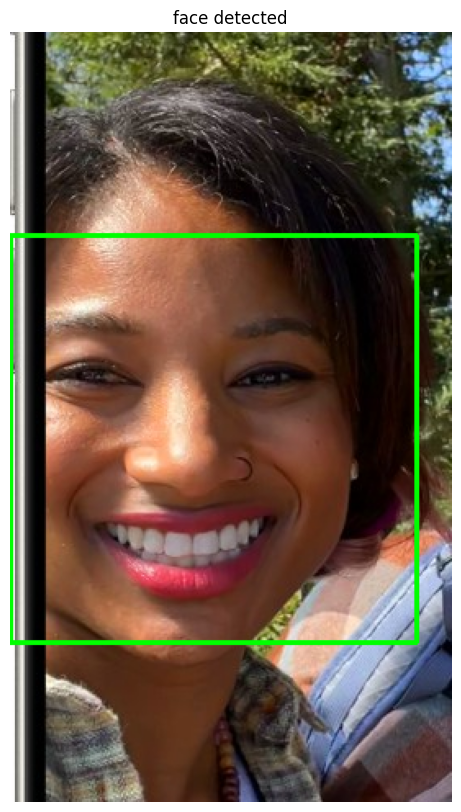

In [ ]:
# ==== USO ====
link = "/content/drive/MyDrive/02. Profession AI/g. ML_tecniche_avanzate/Face Detection per Fotocamere Digitali/kaggle_dataset_project/FairFace/val2/selfie_web.jpg"
image = cv2.imread(link)
boxes = detect_faces_multiscale(image, svm_model, window_size, step_h, step_w, scales)
# Stampa risultati
print(f"Numb. of faces detected: {len(boxes)}")
image_with_boxes = draw_boxes(image, boxes)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("face detected")
plt.show()

1. Data una threeshold abbastanza selettiva >95%, la pipeline ha riconosciuto la presenza di almeno 3 riquadri contentene un volto nell'immagine considerata, con le seguenti confidenze (probabilità di appartenenza alla classe 1): <br><br>

- "*N. of faces detected with confidence > of 0.95: 3* " <br><br>
- - "*confidence probabilities: 0.952672 e 0.955357 e 1.00000";* <br><br>
2. la funzione detect_faces_multiscale ha estratto il riquadro con la confidenza maggiore (1.00000), eliminando i duplicati con l'algoritmo NMS; <br> <br>
3.  La funzione ha restituito le coordinate della bounding box con confidenza 1.00000: <br>
- - ***Face Coordinates:*** <br>
- - - ***upper-leftside bound   (x1:0 , y1:124)*** <br>
- - - ***lower-rightside bound (x2:248, y2:373)***

4. La funzione "draw_boxes" ha quindi disegnato il rettangolo verde (basato sulle coordinate spaziali restituite della funzione detect_faces_multiscale) su una copia dell'immagine originale, al fine di visualizzazare graficamente la bounding box di face detection.